# PREDICTION DES RETARDS DE VOL

## SOMMAIRE
- Introduction
- Rappel d√©taill√©e des colonnes
- R√©sum√© de l'exploration des donn√©es
- Analyse
  - Import des librairies 
  - Chargement des donn√©es
  - Nettoyage des donn√©es
  - Analyse de la forme des donn√©es
    - Types de donn√©es
    - Heatmap
  - Analyse de fond
    - Supression des colonnes non utilisables
    - Examen de la colonne target
    - Histogrames des variables continues
      - Variables quantitatives (float)
      - Variables quantitatives (interger)
      - Variables qualitatives (object)
    - Correlation des variables
  - Hypoth√®ses


---

## INTRODUCTION

Les retards de vols constituent une probl√©matique majeure dans le secteur a√©rien, impactant non seulement les passagers, mais aussi les compagnies a√©riennes et les a√©roports. Selon le Bureau of Transportation Statistics des √âtats-Unis, environ 19 % des vols ont √©t√© retard√©s en 2019, engendrant des co√ªts √©conomiques estim√©s √† 28 milliards de dollars. \
Face √† cette complexit√©, le recours √† des approches bas√©es sur les donn√©es, telles que l‚Äôanalyse pr√©dictive, devient essentiel pour anticiper et g√©rer efficacement les retards. \
C‚Äôest dans cette optique que le Bureau of Transportation Statistics a mis √† disposition un jeu de donn√©es, sur lequel nous allons mener une analyse approfondie afin de d√©terminer s‚Äôil est possible d‚Äôentra√Æner un mod√®le de pr√©diction des retards de vols, et le cas √©ch√©ant, d‚Äôidentifier la meilleure approche √† adopter.

---

## RAPPEL D√âTAILL√âE DES COLONNES

Variables temporelles
- **‚ÄãDAY_OF_WEEK** : Jour de la semaine (1 = lundi, 7 = dimanche)‚Äã
- **‚ÄãFL_DATE** : Date compl√®te du vol (format AAAA-MM-JJ)‚Äã‚Äã

Informations sur le vol
- **‚ÄãUNIQUE_CARRIER** : Code unique du transporteur (ex. : 'AA' pour American Airlines)‚Äã
- **‚ÄãAIRLINE_ID** : Identifiant num√©rique de la compagnie a√©rienne‚Äã
- **‚ÄãCARRIER** : Code du transporteur‚Äã
- **‚ÄãTAIL_NUM** : Num√©ro de queue de l'avion‚Äã
- **‚ÄãFL_NUM** : Num√©ro du vol‚Äã

A√©roport d'origine
- **‚ÄãORIGIN_AIRPORT_ID** : Identifiant de l'a√©roport d'origine‚Äã
- **‚ÄãORIGIN_AIRPORT_SEQ_ID** : Identifiant de s√©quence de l'a√©roport d'origine‚Äã
- **‚ÄãORIGIN_CITY_MARKET_ID** : Identifiant du march√© de la ville d'origine‚Äã
- **‚ÄãORIGIN** : Code IATA de l'a√©roport d'origine (ex. : 'JFK')‚Äã
- **‚ÄãORIGIN_CITY_NAME** : Nom de la ville d'origine‚Äã
- **‚ÄãORIGIN_STATE_ABR** : Abr√©viation de l'√âtat d'origine‚Äã
- **‚ÄãORIGIN_STATE_FIPS** : Code FIPS de l'√âtat d'origine‚Äã
- **‚ÄãORIGIN_STATE_NM** : Nom complet de l'√âtat d'origine‚Äã
- **‚ÄãORIGIN_WAC** : Code de zone de l'a√©roport d'origine‚Äã‚Äã

A√©roport de destination
- **DEST_AIRPORT_ID** : Identifiant de l'a√©roport de destination‚Äã
- **‚ÄãDEST_AIRPORT_SEQ_ID** : Identifiant de s√©quence de l'a√©roport de destination‚Äã
- **‚ÄãDEST_CITY_MARKET_ID** : Identifiant du march√© de la ville de destination‚Äã
- **‚ÄãDEST** : Code IATA de l'a√©roport de destination‚Äã
- **‚ÄãDEST_CITY_NAME** : Nom de la ville de destination‚Äã
- **‚ÄãDEST_STATE_ABR** : Abr√©viation de l'√âtat de destination‚Äã
- **‚ÄãDEST_STATE_FIPS** : Code FIPS de l'√âtat de destination‚Äã
- **‚ÄãDEST_STATE_NM** : Nom complet de l'√âtat de destination‚Äã
- **‚ÄãDEST_WAC** : Code de zone de l'a√©roport de destination‚Äã

Horaires et retards
- **‚ÄãCRS_DEP_TIME** : Heure de d√©part pr√©vue (au format HHMM)‚Äã
- **‚ÄãDEP_TIME** : Heure r√©elle de d√©part‚Äã
- **‚ÄãDEP_DELAY** : Retard au d√©part en minutes (n√©gatif si en avance)‚Äã
- **‚ÄãDEP_DELAY_NEW** : Retard au d√©part, avec 0 pour les retards ‚â§ 0‚Äã
- **‚ÄãDEP_DEL15** : Indicateur de retard au d√©part ‚â• 15 minutes (1 = oui, 0 = non)‚Äã
- **‚ÄãDEP_DELAY_GROUP** : Groupe de retard au d√©part (par tranches de 15 minutes)‚Äã
- **‚ÄãDEP_TIME_BLK** : Plage horaire du d√©part (ex. : '0600-0659')‚Äã
- **‚ÄãTAXI_OUT** : Temps de roulage avant le d√©collage (en minutes)‚Äã
- **‚ÄãWHEELS_OFF** : Heure de d√©collage (roues quittant le sol)‚Äã
- **‚ÄãWHEELS_ON** : Heure d'atterrissage (roues touchant le sol)‚Äã
- **‚ÄãTAXI_IN** : Temps de roulage apr√®s l'atterrissage (en minutes)‚Äã
- **‚ÄãCRS_ARR_TIME** : Heure d'arriv√©e pr√©vue‚Äã
- **‚ÄãARR_TIME** : Heure r√©elle d'arriv√©e‚Äã
- **‚ÄãARR_DELAY** : Retard √† l'arriv√©e en minutes‚Äã
- **‚ÄãARR_DELAY_NEW** : Retard √† l'arriv√©e, avec 0 pour les retards ‚â§ 0‚Äã
- **‚ÄãARR_DEL15** : Indicateur de retard √† l'arriv√©e ‚â• 15 minutes (1 = oui, 0 = non)‚Äã
- **‚ÄãARR_DELAY_GROUP** : Groupe de retard √† l'arriv√©e (par tranches de 15 minutes)‚Äã
- **‚ÄãARR_TIME_BLK** : Plage horaire de l'arriv√©e (ex. : '0900-0959')‚Äã

Annulations et d√©tournements
- **CANCELLED** : Indicateur d'annulation du vol (1 = oui, 0 = non)‚Äã
- **‚ÄãCANCELLATION_CODE** : Code de la raison de l'annulation (A = transporteur, B = m√©t√©o, C =NAS, D = s√©curit√©)‚Äã
- **DIVERTED** : Indicateur de vol d√©tourn√© (1 = oui, 0 = non)‚Äã‚Äã

Dur√©es et distances
- **‚ÄãCRS_ELAPSED_TIME** : Dur√©e pr√©vue du vol (en minutes)‚Äã
- **‚ÄãACTUAL_ELAPSED_TIME** : Dur√©e r√©elle du vol (en minutes)‚Äã
- **‚ÄãAIR_TIME** : Temps de vol effectif (en minutes)

---

## R√âSUM√â DE L'EXPLORATION DES DONN√âES

Ici, nous pr√©senterons l‚Äôensemble des informations que nous jugeons importantes √† pr√©ciser. Il s‚Äôagira en quelque sorte du r√©sum√© final de notre analyse.

#### Objectif :
- Comprendre du mieux possible nos donn√©es
- D√©velopper une premi√®re strat√©gie de mod√©lisation 

#### Analyse de Forme :
- **Variable target** : ARR_DEL15 
- **Lignes et colonnes** : 1 111 240 lignes et 32 colonnes
- **Types de variables** : Qualitatives : 8, Quantitatives : 23
- **Analyse des valeurs manquantes** :
  - Le dataset est plutot complet. Il y assez peu de valeurs NaN.
  - Seulement 8 colonnes sur 31 ne pourrons pas √™tre utilis√©s car taux de NaN sup√©rieur √† 90%
    - CARRIER_DELAY
    - LATE_AIRCRAFT_DELAY
    - WEATHER_DELAY
    - NAS_DELAY
    - SECURITY_DELAY
    - FIRST_DEP_TIME
    - TOTAL_ADD_GTIME
    - LONGEST_ADD_GTIME

#### Analyse de Fond :
- **Visualisation de la target** :
  - 17 % des vols sont en retard de plus de 15 minutes
  - 193 688 vols en retard sur un total de 1 111 240.

- **Signification des variables** :

  - **Redondances** : 
    - UNIQUE_CARRIER / CARRIERE
    - ORIGIN / ORIGIN_CITY_NAME
    - ORIGIN_STATE / ORIGIN_STATE_NM : 
    - DEST / DEST_CITY_NAME : 
    - DEST_STATE_ABR / DEST_STATE_NM : 


  - **Variables cl√©s** :
    - DEP_DELAY, ARR_DELAY, DEP_DEL15, ARR_DEL15 : mesures principales du retard.
    - DEP_TIME_BLK, ARR_TIME_BLK : plages horaires normalis√©es. Utiles pour cat√©goriser le trafic.
    - UNIQUE_CARRIER, ORIGIN, DEST : identifiants des compagnies et des a√©roports ‚Äî tr√®s corr√©l√©s aux retards dans certains cas.

- **Relation Variables / Target** :
  - DEP_DELAY, DEP_DEL15 : fortement corr√©l√©s avec ARR_DEL15. Un retard au d√©part m√®ne souvent √† un retard √† l‚Äôarriv√©e.
  - DEP_DELAY_GROUP : m√™me logique ‚Äî plus le groupe est √©lev√©, plus la probabilit√© de retard augmente.
  - ARR_DELAY, ARR_DELAY_NEW, ARR_TIME, WHEELS_ON : variables connues apr√®s le vol ‚Üí fuites de donn√©es, donc √† exclure comme features.
  - CANCELLED, DIVERTED : peu fr√©quents mais biaisants (pas d‚Äôarriv√©e mesurable) ‚Üí √† filtrer en amont.
  - DEP_TIME_BLK, ARR_TIME_BLK : certaines plages horaires (ex. matin et soir) sont plus sujettes aux retards ‚Üí feature int√©ressante.
  - DISTANCE, DISTANCE_GROUP : impacte la probabilit√© de retard, mais de mani√®re non lin√©aire (pas toujours plus de retard sur les longs vols).
  - ORIGIN, DEST : certains a√©roports (grands hubs, m√©t√©o difficile) g√©n√®rent plus de retards que d‚Äôautres.

- **NaN analyse** : 
  - Pr√©sence de valeurs manquantes dans : ARR_TIME, ARR_DELAY, WHEELS_ON, TAXI_IN, souvent li√©es √† des vols annul√©s ou d√©tourn√©s

#### Hypotheses : 

- ‚úÖ H1 : Retards selon la plage horaire de d√©part (DEP_TIME_BLK)
- ‚úÖ H2 : Retards selon la compagnie (UNIQUE_CARRIER)
- ‚úÖ H3 : Retards selon l'a√©roport d‚Äôorigine (ORIGIN)
- ‚úÖ H4 : Retards selon le jour de la semaine (DAY_OF_WEEK)
- ‚úÖ H5 : Retards selon le mois (MONTH)
- ‚ùå H6 : Plus la distance d‚Äôun vol est grande, plus il a de risques d‚Äô√™tre en retard (DISTANCE_GROUP)

---

## ANALYSE

### IMPORT DES LIBRAIRIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from skimpy import skim

---

### CHARGEMENT DES DONN√âES

Nos donn√©es sont r√©parties dans plusieurs fichiers (un fichier par mois de l‚Äôann√©e 2016). \
Nous allons donc, dans un premier temps, essayer d'agr√©ger l'ensemble des csv √† notre disposition dans un seul et unique dataframe (csv)

In [2]:
# Panda library display setting for greater visual comfort
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
# Load all CSVs into the "dfs" variable
dfs = []

for month in range(1, 13):
    file = f"data/2016_{month:02}.csv"
    try:
        tmp = pd.read_csv(file, on_bad_lines='warn', low_memory=False)
        dfs.append(tmp)
        print(f"Loaded {file} ‚úÖ")
    except pd.errors.ParserError as e:
        print(f"ParserError for {file}: {e}")
    print("-" * 50)

Loaded data/2016_01.csv ‚úÖ
--------------------------------------------------
Loaded data/2016_02.csv ‚úÖ
--------------------------------------------------
Loaded data/2016_03.csv ‚úÖ
--------------------------------------------------


/tmp/ipykernel_301211/4025934662.py:7: ParserWarning: Skipping line 121012: expected 65 fields, saw 75
Skipping line 386249: expected 65 fields, saw 83
Skipping line 388291: expected 65 fields, saw 78
Skipping line 389371: expected 65 fields, saw 72
Skipping line 389548: expected 65 fields, saw 81
Skipping line 453858: expected 65 fields, saw 97

  tmp = pd.read_csv(file, on_bad_lines='warn', low_memory=False)


Loaded data/2016_04.csv ‚úÖ
--------------------------------------------------
Loaded data/2016_05.csv ‚úÖ
--------------------------------------------------
Loaded data/2016_06.csv ‚úÖ
--------------------------------------------------
Loaded data/2016_07.csv ‚úÖ
--------------------------------------------------
Loaded data/2016_08.csv ‚úÖ
--------------------------------------------------
Loaded data/2016_09.csv ‚úÖ
--------------------------------------------------
Loaded data/2016_10.csv ‚úÖ
--------------------------------------------------
Loaded data/2016_11.csv ‚úÖ
--------------------------------------------------
Loaded data/2016_12.csv ‚úÖ
--------------------------------------------------


In [4]:
# Concat all dataframes in "full_df"
full_df = pd.concat(dfs, ignore_index=True)

---

### NETTOYAGE DES DONN√âES

On commence par uniformiser le nom des colonnes (ex: Origin_CITY_NAME -> ORIGIN_CITY_NAME)

In [5]:
# Standardize column names
full_df.columns = [col.strip().upper() for col in full_df.columns]

On regarde maitenant les diff√©rents types que l'on peut avoir dans notre dataset

In [6]:
# Check columns types
full_df.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of YEAR                      object
QUARTER                   object
MONTH                      int64
DAY_OF_MONTH              object
DAY_OF_WEEK               object
FL_DATE                   object
UNIQUE_CARRIER            object
AIRLINE_ID                 int64
CARRIER                   object
TAIL_NUM                  object
FL_NUM                    object
ORIGIN_AIRPORT_ID         object
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN_CITY_MARKET_ID     object
ORIGIN                    object
ORIGIN_CITY_NAME          object
ORIGIN_STATE_ABR          object
ORIGIN_STATE_FIPS        float64
ORIGIN_STATE_NM           object
ORIGIN_WAC                object
DEST_AIRPORT_ID           object
DEST_AIRPORT_SEQ_ID       object
DEST_CITY_MARKET_ID       object
DEST                      object
DEST_CITY_NAME            object
DEST_STATE_ABR            object
DEST_STATE_FIPS          float64
DEST_STATE_NM             object
DEST_WAC                 float64

Ou en utilisant un graphique

<Axes: ylabel='count'>

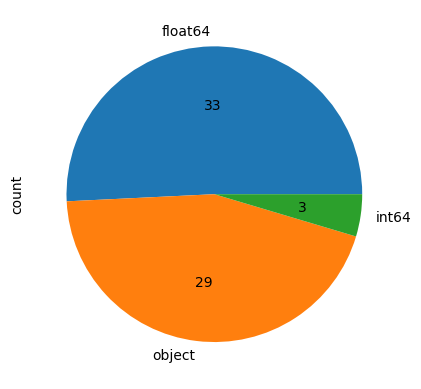

In [7]:
full_df.dtypes.value_counts().plot.pie(autopct=lambda p: '{:.0f}'.format(p * full_df.dtypes.value_counts().sum() / 100))

Certaines colonnes pr√©sentant des types inadapt√©s, un pr√©traitement des donn√©es est requis avant mod√©lisation.

Les colonnes suivantes sont nettoy√©es puis converties en type entier (int) afin d‚Äôassurer une coh√©rence et d'optimiser l'entrainement de notre futur model

- MONTH
- DAY_OF_MONTH
- DAY_OF_WEEK"

In [8]:
# Transform date column to integer
columns_to_convert = ['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK']

for col in columns_to_convert:
    if col in full_df.columns:
        # Remove white space
        full_df[col] = full_df[col].astype(str).str.strip()

        # Convert to numeric
        full_df[col] = pd.to_numeric(full_df[col], errors='coerce')

        # Force type to int
        full_df[col] = full_df[col].astype('Int64')


Ensuite on nettoie les colonnes qui ne sont pas des nombres (float, int) en retirant les espaces et les erreurs de formatage

In [9]:
# Convert all non-float columns to string (explicit string values, will be quoted when saving)
for col in full_df.columns:
    if not (pd.api.types.is_float_dtype(full_df[col]) or pd.api.types.is_integer_dtype(full_df[col])):
        # Remove white space
        full_df[col] = full_df[col].astype(str).str.strip()
        # Force type to string
        full_df[col] = full_df[col].astype(str)

Comme la colonne ARR_DEL15 repr√©sente la variable cible, les lignes o√π cette valeur est manquante ne peuvent pas √™tre utilis√©es pour l'entra√Ænement. Elles sont donc supprim√©es.

In [10]:
# Drop rows with missing target
full_df = full_df.dropna(subset=['ARR_DEL15'])

En r√©fl√©chissant √† la signification de certaines colonnes, on constate que plusieurs d'entre elles ne seront pas utiles pour pr√©dire un retard de plus de 15 minutes.
Nous choisissons donc de les retirer de notre jeu de donn√©es.

Suppression des lignes o√π les vols sont annul√©s (CANCELLED) ou d√©tourn√©s (DIVERTED).
Notre objectif √©tant de pr√©dire un retard, les vols qui n'ont jamais d√©coll√© ou qui ont √©t√© d√©vi√©s ne sont pas pertinents pour l'entra√Ænement du mod√®le et risquent de biaiser les r√©sultats.

In [11]:
# Keep only flights that were not cancelled or diverted
full_df = full_df[(full_df['CANCELLED'] != 1.0) & (full_df['DIVERTED'] != 1.0)]

Suppression des colonnes suivantes :

- FL_DATE : \
Risque de sur-apprentissage, car la date a d√©j√† √©t√© d√©compos√©e en plusieurs colonnes (MONTH, DAY_OF_WEEK, DAY_OF_MONTH).

- TAIL_NUM : \
Identifiant unique de l‚Äôavion, violation RGPD

- FL_NUM : \
Num√©ro de vol, violation RGPD

- ORIGIN_CITY_NAME, DEST_CITY_NAME : \
Redondance avec ORIGIN, DEST

- ORIGIN_STATE_NM, DEST_STATE_NM : \
Redondance avec STATE_ABR, FIPS

- DEP_TIME, WHEELS_OFF, WHEELS_ON, ARR_TIME, DEP_DELAY, DEP_DELAY_NEW, DEP_DELAY_GROUP, DEP_DEL15, ACTUAL_ELAPSED_TIME, AIR_TIME : \
Connus apr√®s le vol, peu biaiser la pr√©diction

- ARR_DELAY, ARR_DELAY_NEW, ARR_DELAY_GROUP, ARR_TIME_BLK : \
Ce sont des d√©riv√©s directs de la variable cible ARR_DEL15. Les garder biaiserait fortement la pr√©diction.

- CANCELLED, DIVERTED, CANCELLATION_CODE : \
Les lignes concern√©es ont d√©j√† √©t√© supprim√©es en amont, ces colonnes deviennent donc inutiles.

- 'AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID' : \
Identifiants techniques ou non interpr√©tables

- FLIGHTS :
Aucune information sur la donn√©e

- CARRIER :
Redondance avec 'UNIQUE_CARRIER'

In [12]:
# Drop columns that cause leakage or are redundant
cols_to_drop = [
    'FL_DATE',

    'TAIL_NUM', 'FL_NUM',

    'AIRLINE_ID',
    'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
    'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID',

    'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM',
    'DEST_CITY_NAME', 'DEST_STATE_NM',
   
    'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'ARR_TIME',
    'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DELAY_GROUP', 'DEP_DEL15',
    'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
    'ACTUAL_ELAPSED_TIME', 'AIR_TIME',

    'CANCELLED', 'DIVERTED', 'CANCELLATION_CODE',

    'FLIGHTS',

    'CARRIER',

    'UNNAMED: 64'
]

full_df = full_df.drop(columns=[col for col in cols_to_drop if col in full_df.columns])

Afin de r√©duire la taille du jeu de donn√©es, nous s√©lectionnons un √©chantillon de 20 %, tout en conservant la distribution de la variable cible (ARR_DEL15) gr√¢ce √† un √©chantillonnage stratifi√©.

In [13]:
# Stratified sampling (keep class distribution of ARR_DEL15)
data = train_test_split(
    full_df,
    test_size=0.2,
    stratify=full_df['ARR_DEL15'],
    random_state=42
)[1].reset_index(drop=True)

In [14]:
data.head()

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK UNIQUE_CARRIER ORIGIN  \
0  2016        2      4            28            4             B6    MSY   
1  2016        4     10             3            1             UA    CLE   
2  2016        3      9            12            1             OO    SFO   
3  2016        1      3            15            2             OO    SFO   
4  2016        3      8            11            4             AA    DFW   

  ORIGIN_STATE_ABR  ORIGIN_STATE_FIPS ORIGIN_WAC DEST DEST_STATE_ABR  \
0               LA               22.0         72  JFK             NY   
1               OH               39.0         44  ORD             IL   
2               CA                6.0         91  SMF             CA   
3               CA                6.0         91  TUS             AZ   
4               TX               48.0         74  SAT             TX   

   DEST_STATE_FIPS  DEST_WAC  CRS_DEP_TIME DEP_TIME_BLK TAXI_OUT  TAXI_IN  \
0             36.0      22.0        1000.0    1000-1059    20.00      4.0   
1             17.0      41.0        1100.0    1100-1159     13.0     14.0   
2              6.0      91.0        2300.0    2300-2359     21.0      5.0   
3              4.0      81.0        1933.0    1900-1959     14.0      4.0   
4             48.0      74.0        1755.0    1700-1759      9.0      3.0   

   CRS_ARR_TIME  ARR_DEL15  CRS_ELAPSED_TIME  DISTANCE  DISTANCE_GROUP  \
0        1352.0        0.0             172.0    1182.0             5.0   
1        1125.0        0.0              85.0     316.0             2.0   
2        2349.0        0.0              49.0      86.0             1.0   
3        2144.0        0.0             131.0     751.0             4.0   
4        1859.0        0.0              64.0     247.0             1.0   

   CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
0            NaN            NaN        NaN             NaN   
1            NaN            NaN        NaN             NaN   
2            NaN            NaN        NaN             NaN   
3            NaN            NaN        NaN             NaN   
4            NaN            NaN        NaN             NaN   

   LATE_AIRCRAFT_DELAY  FIRST_DEP_TIME  TOTAL_ADD_GTIME  LONGEST_ADD_GTIME  
0                  NaN             NaN              NaN                NaN  
1                  NaN             NaN              NaN                NaN  
2                  NaN             NaN              NaN                NaN  
3                  NaN             NaN              NaN                NaN  
4                  NaN             NaN              NaN                NaN

In [15]:
skim(data)

‚ï≠‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ skimpy summary ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ïÆ
‚îÇ          Data Summary                 Data Types                                                                ‚îÇ
‚îÇ ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì                                                         ‚îÇ
‚îÇ ‚îÉ Dataframe         ‚îÉ Values  ‚îÉ ‚îÉ Column Type ‚îÉ Count ‚îÉ                                                         ‚îÇ
‚îÇ ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î© ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©                                                         ‚îÇ
‚îÇ ‚îÇ Number of rows    ‚îÇ 1111240 ‚îÇ ‚îÇ float64     ‚îÇ 18    ‚îÇ                                                         ‚îÇ
‚îÇ ‚îÇ Number of columns ‚îÇ 31      ‚îÇ ‚îÇ string      ‚îÇ 8     ‚îÇ                                                         ‚îÇ
‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò ‚îÇ int64       ‚îÇ 5     ‚îÇ                                                         ‚îÇ
‚îÇ                                 ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò                                                         ‚îÇ
‚îÇ                                                     number                                                      ‚îÇ
‚îÇ ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì  ‚îÇ
‚îÇ ‚îÉ column          ‚îÉ NA      ‚îÉ NA %            ‚îÉ mean    ‚îÉ sd     ‚îÉ p0   ‚îÉ p25  ‚îÉ p50  ‚îÉ p75  ‚îÉ p100 ‚îÉ hist   ‚îÉ  ‚îÇ
‚îÇ ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©  ‚îÇ
‚îÇ ‚îÇ YEAR            ‚îÇ       0 ‚îÇ               0 ‚îÇ    2016 ‚îÇ      0 ‚îÇ 2016 ‚îÇ 2016 ‚îÇ 2016 ‚îÇ 2016 ‚îÇ 2016 ‚îÇ     ‚ñà  ‚îÇ  ‚îÇ
‚îÇ ‚îÇ QUARTER         ‚îÇ       0 ‚îÇ               0 ‚îÇ   2.493 ‚îÇ  1.123 ‚îÇ    1 ‚îÇ    1 ‚îÇ    3 ‚îÇ    3 ‚îÇ    4 ‚îÇ ‚ñà ‚ñá ‚ñà‚ñà ‚îÇ  ‚îÇ
‚îÇ ‚îÇ MONTH           ‚îÇ       0 ‚îÇ               0 ‚îÇ   6.519 ‚îÇ  3.415 ‚îÇ    1 ‚îÇ    3 ‚îÇ    7 ‚îÇ    9 ‚îÇ   12 ‚îÇ ‚ñá‚ñà‚ñà‚ñà‚ñà‚ñá ‚îÇ  ‚îÇ
‚îÇ ‚îÇ DAY_OF_MONTH    ‚îÇ       0 ‚îÇ               0 ‚îÇ   15.82 ‚îÇ    8.8 ‚îÇ    1 ‚îÇ    8 ‚îÇ   16 ‚îÇ   23 ‚îÇ   31 ‚îÇ ‚ñá‚ñá‚ñá‚ñá‚ñá‚ñà ‚îÇ  ‚îÇ
‚îÇ ‚îÇ DAY_OF_WEEK     ‚îÇ       0 ‚îÇ               0 ‚îÇ   3.927 ‚îÇ  1.985 ‚îÇ    1 ‚îÇ    2 ‚îÇ    4 ‚îÇ    6 ‚îÇ    7 ‚îÇ ‚ñÖ‚ñÑ‚ñÖ‚ñÖ‚ñÖ‚ñà ‚îÇ  ‚îÇ
‚îÇ ‚îÇ ORIGIN_STATE_FI ‚îÇ       0 ‚îÇ               0 ‚îÇ   25.68 ‚îÇ  16.66 ‚îÇ    1 ‚îÇ   12 ‚îÇ   24 ‚îÇ   40 ‚îÇ   78 ‚îÇ ‚ñà‚ñÑ‚ñÑ‚ñÑ‚ñÅ  ‚îÇ  ‚îÇ
‚îÇ ‚îÇ PS              ‚îÇ         ‚îÇ                 ‚îÇ         ‚îÇ        ‚îÇ      ‚îÇ      ‚îÇ      ‚îÇ      ‚îÇ      ‚îÇ        ‚îÇ  ‚îÇ
‚îÇ ‚îÇ DEST_STATE_FIPS ‚îÇ       0 ‚îÇ               0 ‚îÇ   25.68 ‚îÇ  16.64 ‚îÇ    1 ‚îÇ   12 ‚îÇ   24 ‚îÇ   40 ‚îÇ   78 ‚îÇ ‚ñà‚ñÑ‚ñÑ‚ñÑ‚ñÅ  ‚îÇ  ‚îÇ
‚îÇ ‚îÇ DEST_WAC        ‚îÇ       0 ‚îÇ               0 ‚îÇ   55.76 ‚îÇ  26.98 ‚îÇ    1 ‚îÇ   34 ‚îÇ   52 ‚îÇ   82 ‚îÇ   93 ‚îÇ ‚ñÅ‚ñÇ‚ñà‚ñÅ‚ñÑ‚ñá ‚îÇ  ‚îÇ
‚îÇ ‚îÇ CRS_DEP_TIME    ‚îÇ       0 ‚îÇ   

On fait une copie de notre dataset pour conserver le jeu de donn√©es initial sous la main

In [16]:
df = data.copy()

---

### ANALYSE DE LA FORME DES DONN√âES

#### TYPES DE DONN√âES

On commence par regarder les dimensions de notre dataset

In [17]:
df.shape

(1111240, 31)

Nous avons donc : 
 - 1111240 lignes.
 - 31 colonnes

Ensuite on regarde le type de nos donn√©es

<Axes: ylabel='count'>

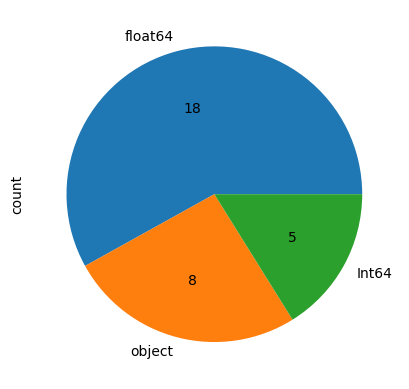

In [18]:
df.dtypes.value_counts().plot.pie(autopct=lambda p: '{:.0f}'.format(p * df.dtypes.value_counts().sum() / 100))

Nous avons donc 
- Qualitatives : (18 + 5) = 23
- Quantitatives : 8

---

#### HEATMAP

On regarde maintenant le taux de valeurs manquantes dans notre dataset √† l'aide d'une heatmap

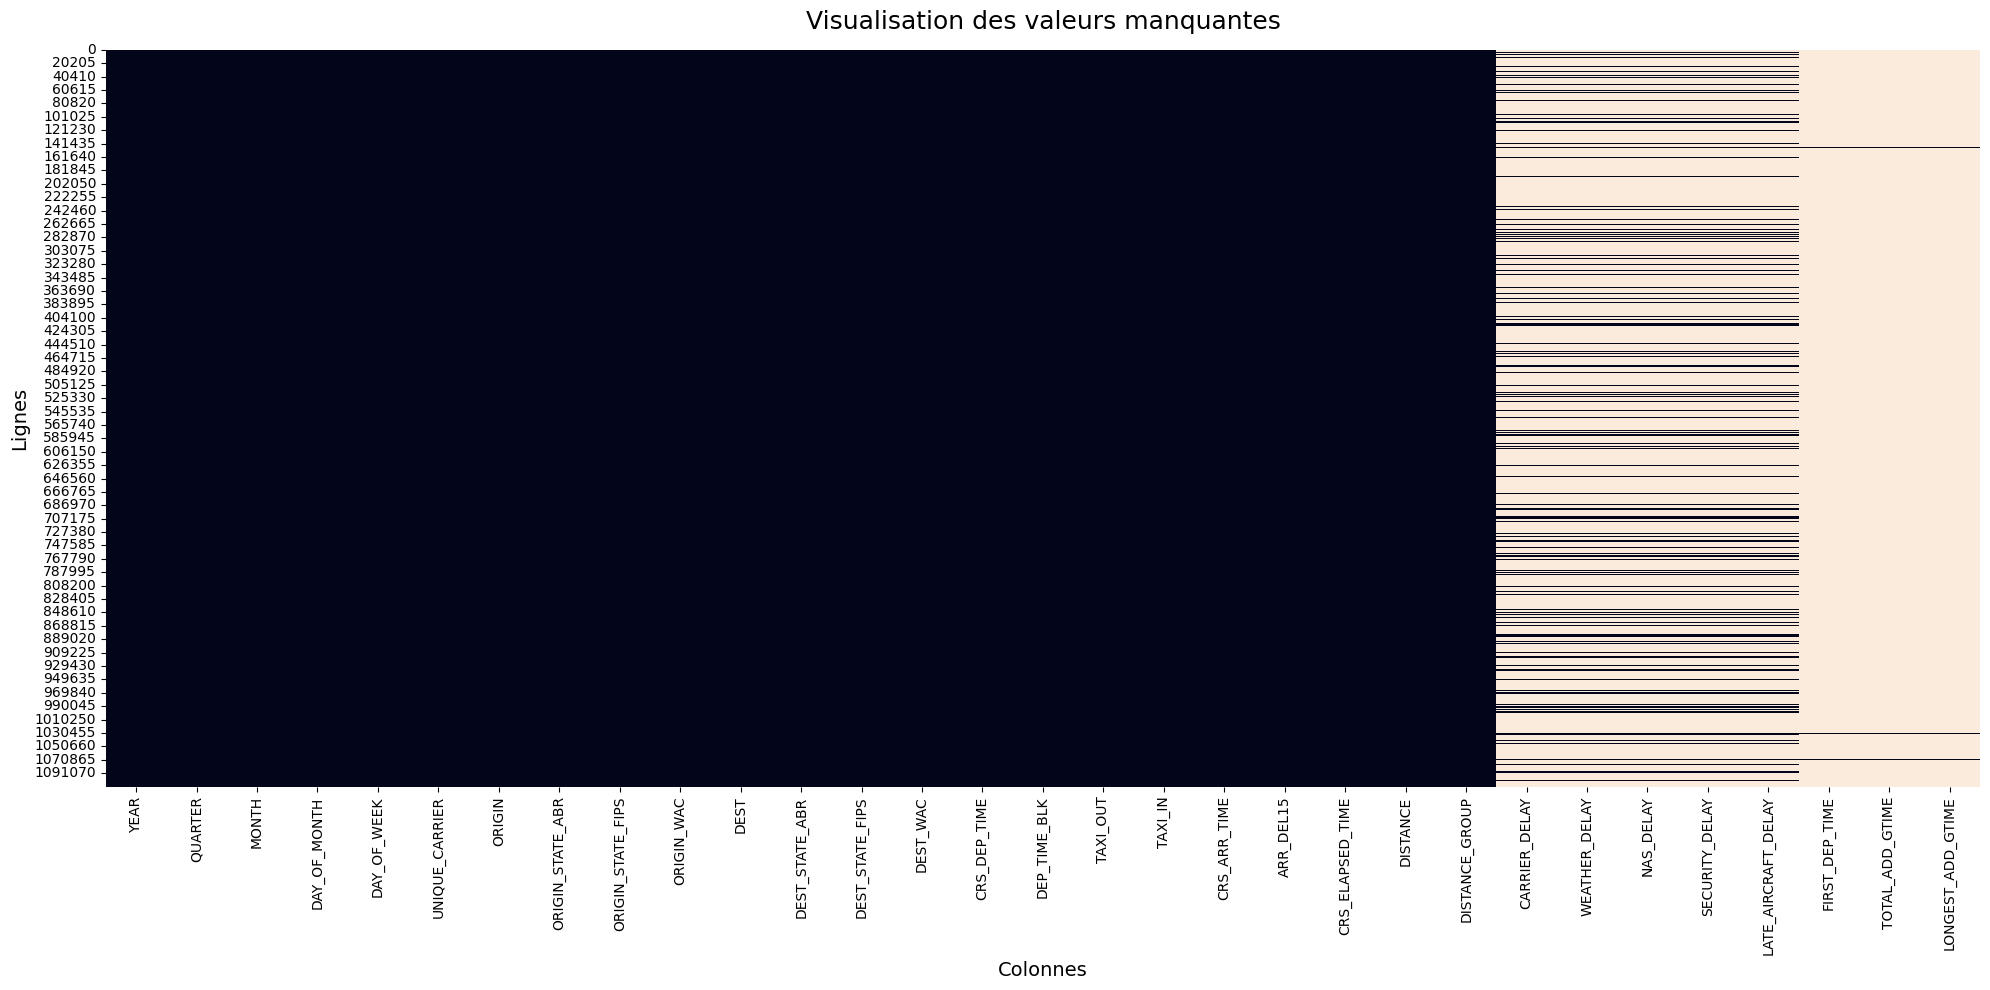

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)
plt.title("Visualisation des valeurs manquantes", fontsize=18, pad=15)
plt.xlabel("Colonnes", fontsize=14)
plt.ylabel("Lignes", fontsize=14)
plt.tight_layout()
plt.show()

Puis on ordonne les colonnes par taux de valeurs manquantes (de la colonne la plus compl√®te √† la moins compl√®te) 

In [20]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

YEAR                   0.000000
QUARTER                0.000000
MONTH                  0.000000
DAY_OF_MONTH           0.000000
DAY_OF_WEEK            0.000000
UNIQUE_CARRIER         0.000000
ORIGIN                 0.000000
ORIGIN_STATE_ABR       0.000000
ORIGIN_STATE_FIPS      0.000000
ORIGIN_WAC             0.000000
DEST                   0.000000
DEST_STATE_ABR         0.000000
DEST_STATE_FIPS        0.000000
DEST_WAC               0.000000
CRS_DEP_TIME           0.000000
DEP_TIME_BLK           0.000000
TAXI_OUT               0.000000
TAXI_IN                0.000000
CRS_ARR_TIME           0.000000
ARR_DEL15              0.000000
CRS_ELAPSED_TIME       0.000000
DISTANCE               0.000000
DISTANCE_GROUP         0.000000
CARRIER_DELAY          0.825701
WEATHER_DELAY          0.825701
NAS_DELAY              0.825701
SECURITY_DELAY         0.825701
LATE_AIRCRAFT_DELAY    0.825701
FIRST_DEP_TIME         0.994121
TOTAL_ADD_GTIME        0.994121
LONGEST_ADD_GTIME      0.994121
dtype: f

On peut voir ici 2 groupes de donn√©es
- Donn√©es manquantes 80 % et plus
- Donn√©es manquantes 0%

---

### ANALYSE DE FOND

#### SUPPRESION DES COLONNES NON UTILISABLES

On retire les colonnes qui ont un taux de valeurs manquantes sup√©rieur √† 80% car cela s'av√®re compliqu√© de travailler avec aussi peu d'informations.

In [21]:
df = df[df.columns[df.isna().sum()/df.shape[0] <0.8]]

---

#### EXAMEN DE LA COLONNE TARGET

On commence par observer la tendance de notre variable target

In [22]:
df['ARR_DEL15'].value_counts()

ARR_DEL15
0.0    917552
1.0    193688
Name: count, dtype: int64

In [23]:
df['ARR_DEL15'].value_counts(normalize=True)

ARR_DEL15
0.0    0.825701
1.0    0.174299
Name: proportion, dtype: float64

On remarque ici que notre colonne target comporte 
- 193 688 avions en retard
- 917 552 avions √† l'heure

---

#### HISTOGRAMES DES VARIABLES CONTINUES

Pour mieux comprendre la distribution de nos donn√©es, nous allons tracer des histogrames des diff√©rentes colonnes

##### VARIABLES QUANTITATIVES (float)

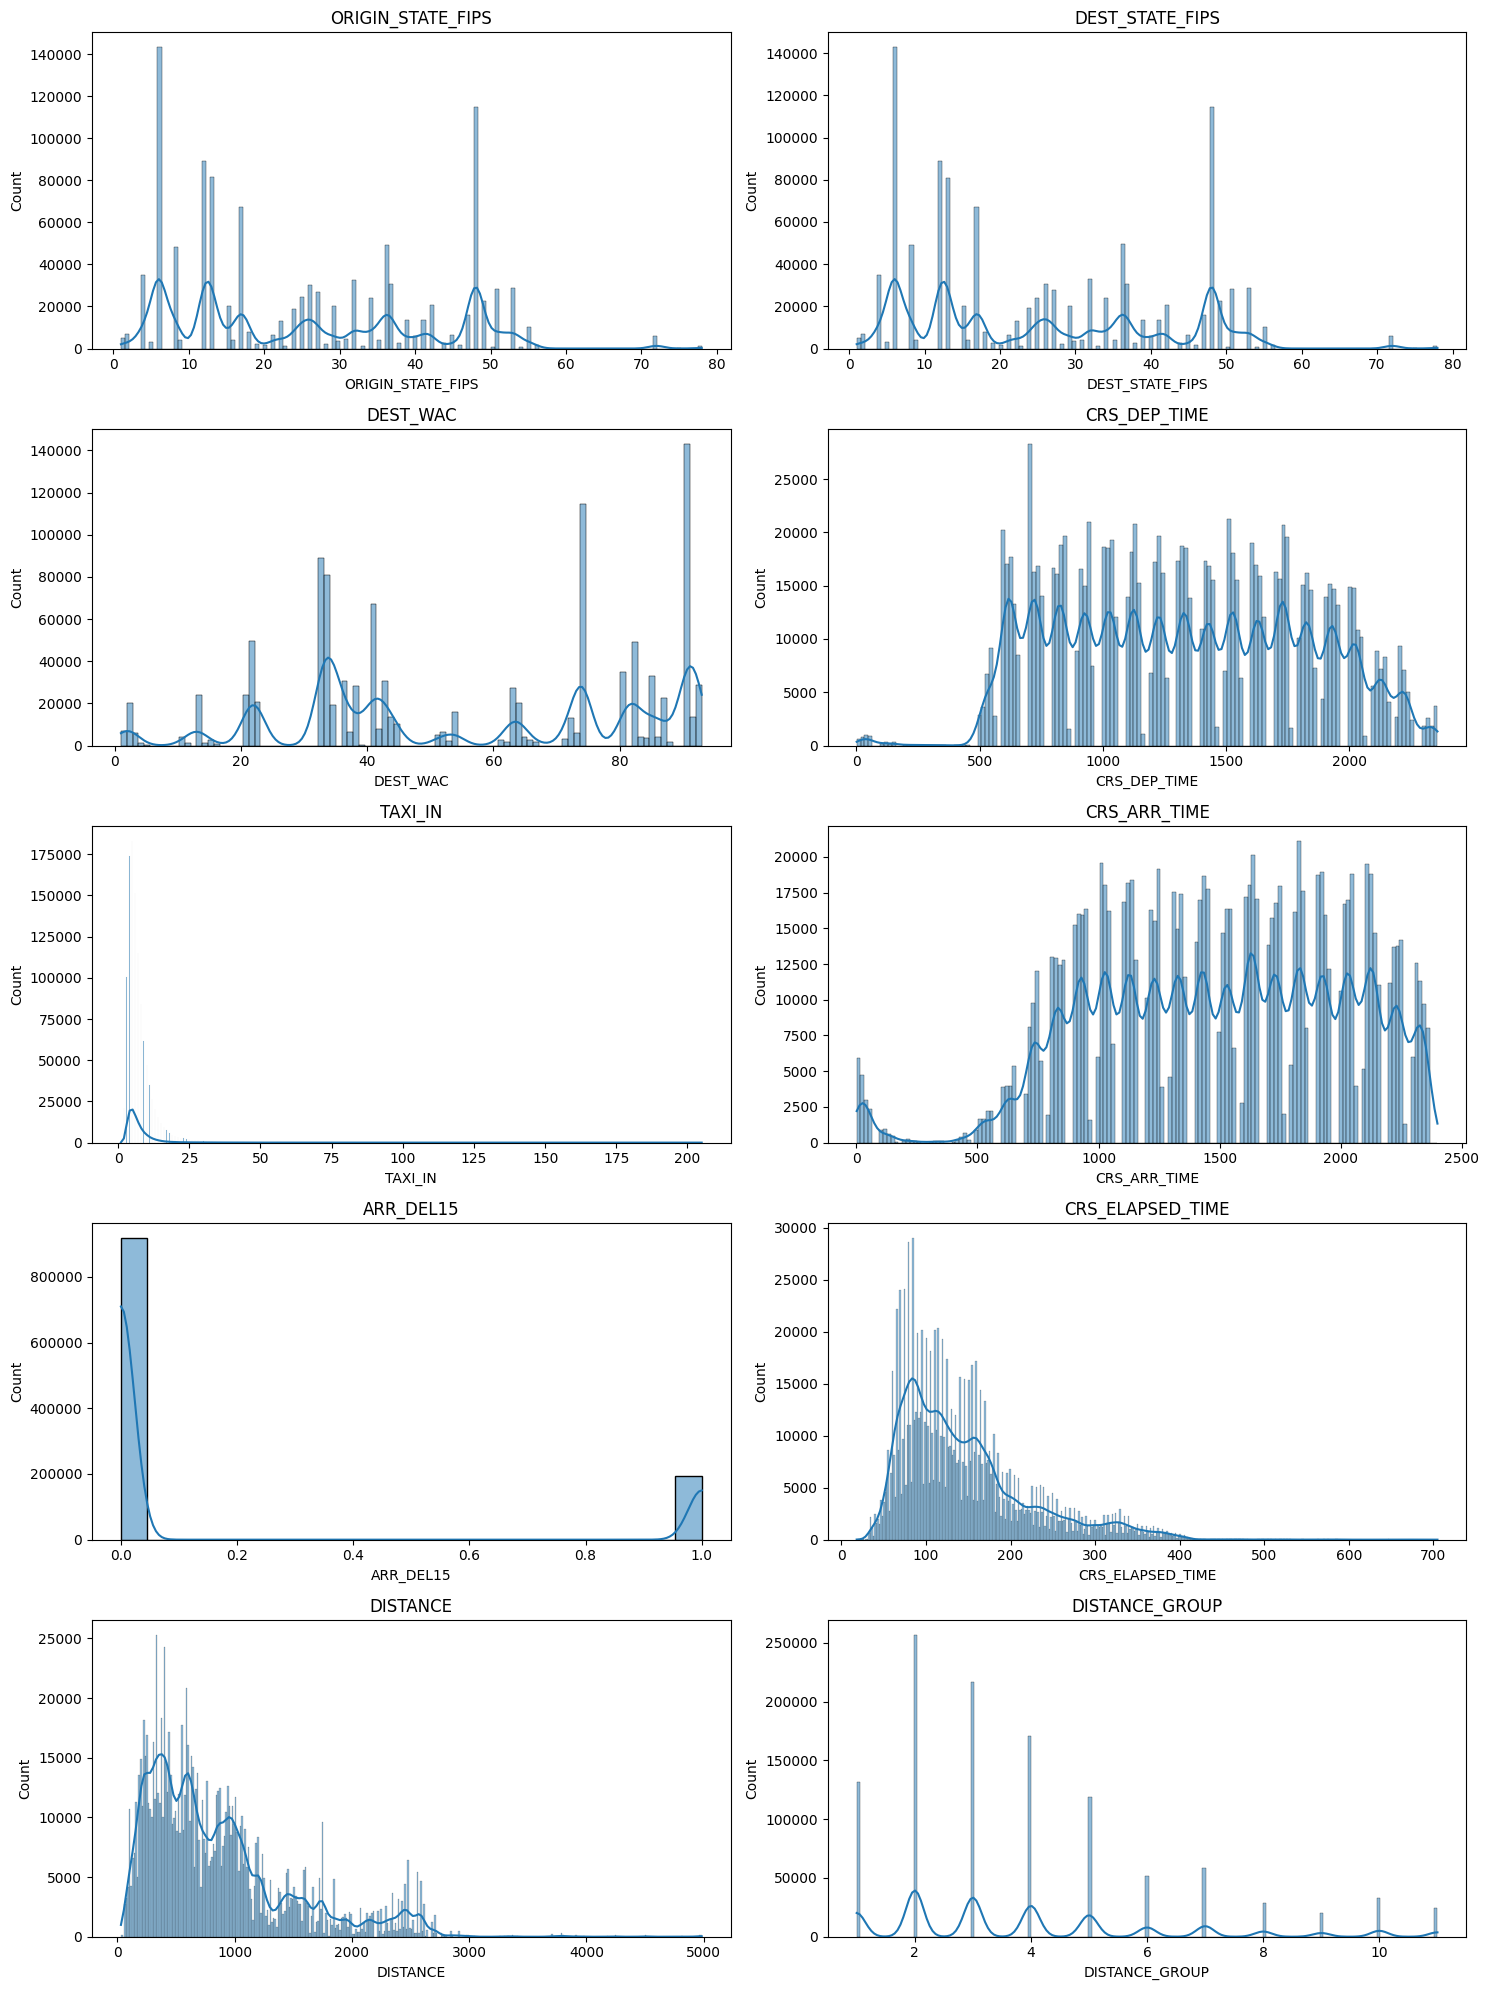

In [24]:
# Select float columns only
float_cols = df.select_dtypes('float').columns

# Set cols per row
n_cols = 2

# Compute necessary row
n_rows = -(-len(float_cols) // n_cols)

# Set grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Set axes as 1D
axes = axes.flatten()

# Loop on each axes and columns
for ax, col in zip(axes, float_cols):
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(col)

plt.tight_layout()
plt.show()

ORIGIN_STATE_FIPS :
- Les vols sont r√©partis entre plusieurs √©tats d‚Äôorigine identifi√©s par leur code FIPS.
- On observe quelques pics marqu√©s, notamment autour des codes 6, 12, 36, 48. Cela correspond probablement aux √âtats avec les a√©roports les plus fr√©quent√©s (ex. : Californie, Floride, New York, Texas).
- La distribution est tr√®s in√©gale, ce qui refl√®te une concentration du trafic a√©rien dans quelques √âtats cl√©s.

DEST_STATE_FIPS :
- Comme pour l‚Äôorigine, certains codes d‚Äô√âtats de destination sont nettement plus repr√©sent√©s que d‚Äôautres.
- Le sch√©ma est similaire √† celui de l‚Äôorigine, avec des pics fr√©quents sur les m√™mes √âtats. Cela refl√®te les principales routes.
- Tr√®s peu de vols vont vers les √âtats peu peupl√©s ou p√©riph√©riques.

DEST_WAC :
- La variable DEST_WAC (World Area Code) est aussi tr√®s concentr√©e sur certaines valeurs.
- On retrouve plusieurs pics nets (notamment autour de 40, 50, 80), ce qui peut refl√©ter des regroupements r√©gionaux (ex : zones Ouest, Sud-Est, etc.).
- La r√©partition est h√©t√©rog√®ne, certains codes sont tr√®s rares voire absents.

CRS_DEP_TIME :
- La majorit√© des vols sont pr√©vus entre 500 (5h00) et 2100 (21h00).
- On voit des pics r√©guliers toutes les 100‚Äì200 unit√©s, correspondant √† des plages horaires de d√©part classiques (matin, midi, soir).
- Il y a tr√®s peu de vols planifi√©s pendant la nuit (entre 0h et 5h), ce qui cr√©e un creux marqu√©.

TAXI_IN :
- Une grande majorit√© des vols ont un temps de roulage √† l‚Äôarriv√©e (TAXI_IN) inf√©rieur √† 15 minutes.
- Quelques cas extr√™mes d√©passent les 50 voire 100 minutes, mais ils sont tr√®s rares.
- Cela refl√®te un ph√©nom√®ne classique : la majorit√© des a√©roports ont un temps de roulage stable et court, avec des exceptions sur de grands hubs ou en cas de congestion.

CRS_ARR_TIME :
- Les heures d‚Äôarriv√©e pr√©vues (CRS_ARR_TIME) sont √©galement concentr√©es entre 500 et 2300, avec des pics prononc√©s en matin√©e et en fin d‚Äôapr√®s-midi.
- Le creux entre minuit et 5h refl√®te une tr√®s faible activit√© nocturne.
- La distribution est modulaire, ce qui correspond au fonctionnement par plages horaires programm√©es.

ARR_DEL15 :
- La variable cible (ARR_DEL15) est fortement d√©s√©quilibr√©e : la majorit√© des vols ne sont pas en retard (valeur 0).
- Seule une minorit√© de vols ont un retard √† l‚Äôarriv√©e ‚â• 15 minutes (valeur 1).
- Cette distribution binaire montre clairement qu‚Äôon a un probl√®me de classification d√©s√©quilibr√©, ce qu‚Äôil faudra prendre en compte dans la mod√©lisation (ex. : pond√©ration, sur-√©chantillonnage, etc.).

CRS_ELAPSED_TIME :
- La dur√©e pr√©vue des vols (CRS_ELAPSED_TIME) est concentr√©e entre 60 et 200 minutes.
- Il existe des vols plus longs (jusqu‚Äô√† 700 minutes), mais ils sont beaucoup plus rares.

DISTANCE :
- La majorit√© des vols couvrent une distance inf√©rieure √† 1500 km, avec un pic autour de 500 √† 1000 km.
- Comme pour la dur√©e pr√©vue, la distribution pr√©sente quelques vols tr√®s longs (jusqu‚Äô√† 5000 km).
- La forme g√©n√©rale sugg√®re une distribution asym√©trique, concentr√©e sur les distances moyennes typiques des vols domestiques.

DISTANCE_GROUP :
- La variable DISTANCE_GROUP classe les vols par tranches de distance (par exemple : 1 = < 250 km, 2 = 250‚Äì500 km, etc.).
- Le pic le plus √©lev√© est sur le groupe 3, ce qui correspond √† une distance moyenne (~500‚Äì750 km).
- Les groupes les plus fr√©quents sont les groupes 2 √† 6, ce qui confirme la forte concentration sur les vols court et moyen-courrier. 

---

##### VARIABLES QUALITATIVES (object)

On commence par afficher toutes les valeurs uniques de nos variables qualitatives pour se faire une id√©e du contenu de notre jeu de donn√©es

In [25]:
for col in df.select_dtypes('object'):
    print(f"\n{col} (n = {df[col].nunique()}):")
    for val in sorted(df[col].dropna().unique()):
        print(f"  - {val}")


UNIQUE_CARRIER (n = 12):
  - AA
  - AS
  - B6
  - DL
  - EV
  - F9
  - HA
  - NK
  - OO
  - UA
  - VX
  - WN

ORIGIN (n = 308):
  - ABE
  - ABI
  - ABQ
  - ABR
  - ABY
  - ACK
  - ACT
  - ACV
  - ACY
  - ADK
  - ADQ
  - AEX
  - AGS
  - AKN
  - ALB
  - AMA
  - ANC
  - APN
  - ASE
  - ATL
  - ATW
  - AUS
  - AVL
  - AVP
  - AZO
  - BDL
  - BET
  - BFL
  - BGM
  - BGR
  - BHM
  - BIL
  - BIS
  - BJI
  - BLI
  - BMI
  - BNA
  - BOI
  - BOS
  - BPT
  - BQK
  - BQN
  - BRD
  - BRO
  - BRW
  - BTM
  - BTR
  - BTV
  - BUF
  - BUR
  - BWI
  - BZN
  - CAE
  - CAK
  - CDC
  - CDV
  - CHA
  - CHO
  - CHS
  - CID
  - CIU
  - CLE
  - CLL
  - CLT
  - CMH
  - CMX
  - COD
  - COS
  - CPR
  - CRP
  - CRW
  - CSG
  - CVG
  - CWA
  - DAB
  - DAL
  - DAY
  - DCA
  - DEN
  - DFW
  - DHN
  - DLG
  - DLH
  - DRO
  - DSM
  - DTW
  - DVL
  - EAU
  - ECP
  - EGE
  - EKO
  - ELM
  - ELP
  - ERI
  - ESC
  - EUG
  - EVV
  - EWN
  - EWR
  - EYW
  - FAI
  - FAR
  - FAT
  - FAY
  - FCA
  - FLG
  - FLL
  - FNT
  - FSD

Puis on affiche le tout dans des histogrammes pour voir s'il y a des √©l√©ments importants √† noter.

Attention, certaines colonnes ont des types sous-repr√©sent√©s. On fait le choix d'afficher que les plus importants pour rendre les histogrammes plus lisibles

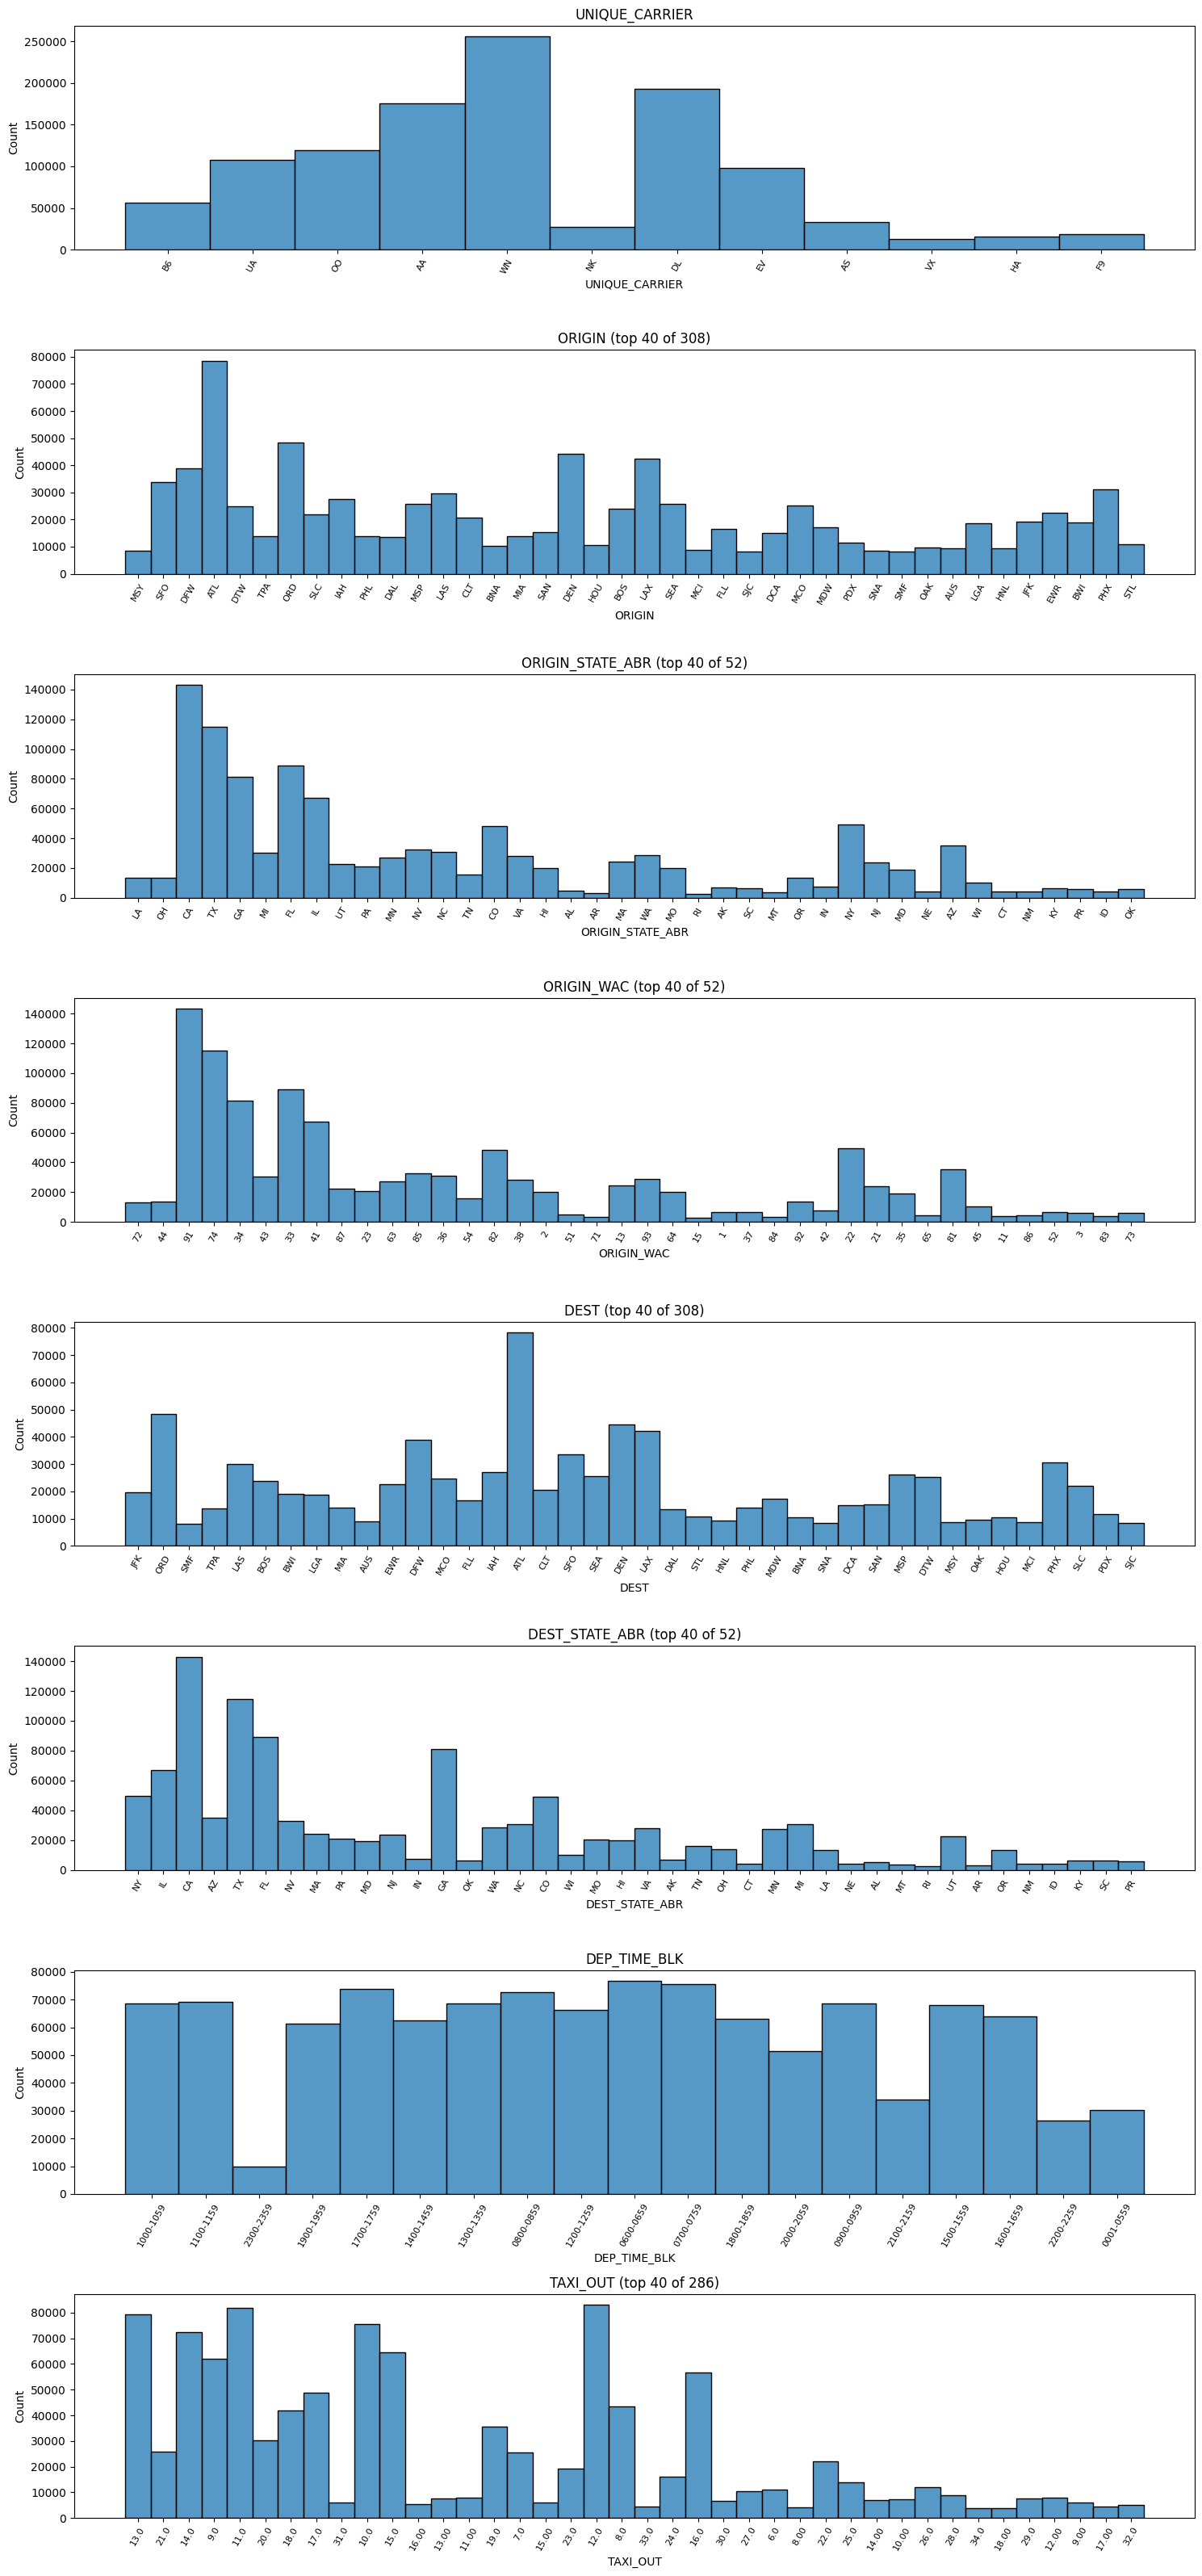

In [26]:
# Parameters
top_n_threshold = 50   # If a column has more than this number of unique values, it will be truncated
top_n = 40             # Number of top categories to display if too many unique values

# Select object-type (categorical) columns
cat_cols = df.select_dtypes('object').columns

# Grid configuration
n_cols = 1
n_rows = -(-len(cat_cols) // n_cols)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Loop over each categorical column and axis
for ax, col in zip(axes, cat_cols):
    nb_unique = df[col].nunique()
    
    # If too many unique categories, filter to top N
    if nb_unique > top_n_threshold:
        top_values = df[col].value_counts().nlargest(top_n).index
        data = df[df[col].isin(top_values)]
        sns.histplot(data[col], ax=ax, kde=False)
        ax.set_title(f"{col} (top {top_n} of {nb_unique})")
    else:
        sns.histplot(df[col], ax=ax, kde=False)
        ax.set_title(col)

    # Improve X-axis readability
    ax.tick_params(axis='x', labelrotation=60, labelsize=8)

plt.tight_layout()
plt.show()

UNIQUE_CARRIER :

- La variable UNIQUE_CARRIER repr√©sente l'identifiant unique de la compagnie a√©rienne.
- La distribution montre une forte concentration autour de quelques compagnies, notamment les plus grosses compagnies nationales comme WN, DL, AA.
- Les compagnies les moins repr√©sent√©es n‚Äôont que tr√®s peu de vols dans l‚Äô√©chantillon, ce qui pourrait poser un probl√®me de g√©n√©ralisation ou de d√©s√©quilibre dans les cat√©gories.

ORIGIN (top 40 of 308) :
- Il y a 308 a√©roports d‚Äôorigine uniques, mais le graphique n‚Äôaffiche que les 40 plus fr√©quents.
- Quelques a√©roports comme ATL, ORD, DFW, DEN, CLT, etc., ont une forte densit√© de vols, ce qui est attendu (hubs majeurs).
- Grande diversit√© d‚Äôa√©roports avec peu de trafic, ce qui peut n√©cessiter une encodage sp√©cial (regroupement)

ORIGIN_STATE_ABR (top 40 of 52) :
- Affiche la r√©partition des vols selon l‚Äô√©tat d‚Äôorigine (abr√©viation).
- Les √âtats comme CA, TX, FL, GA, IL dominent largement, ce qui est coh√©rent avec les hubs majeurs et les √âtats tr√®s peupl√©s.
- Contrairement √† ORIGIN, cette variable est plus stable et agr√©g√©e, donc plus facile √† encoder et souvent pr√©f√©rable si on veut r√©duire la granularit√©.

ORIGIN_WAC (top 40 of 52) :
- La variable ORIGIN_WAC repr√©sente un code de zone g√©ographique standardis√© (World Area Code).
- Certaines zones (ex. : 74, 84, 70‚Ä¶) concentrent une tr√®s forte densit√© de d√©parts, ce qui refl√®te leur importance g√©ographique ou √©conomique.
- Peut √™tre utile pour ajouter une dimension r√©gionale

DEST (top 40 of 308) :
- Il y a 308 a√©roports de destination, mais seuls les 40 plus fr√©quents sont affich√©s.
- Les a√©roports comme ATL, ORD, DFW, DEN apparaissent comme principaux hubs de destination, tr√®s coh√©rents avec le trafic observ√© au d√©part.
- Cette variable a une forte granularit√©

DEST_STATE_ABR (top 40 of 52) :
- Repr√©sente l‚Äôabr√©viation de l‚Äô√âtat de destination.
- Les √âtats les plus repr√©sent√©s (CA, TX, FL, GA, etc.) sont √©galement ceux avec de grands hubs ou une population √©lev√©e.

DEP_TIME_BLK :
- Cette variable repr√©sente la plage horaire pr√©vue de d√©part (ex : 0600-0659).
- La distribution est relativement homog√®ne entre 06h00 et 22h00, avec des creux √©vidents pendant la nuit (0001-0559).
- Cela refl√®te bien les cr√©neaux typiques d‚Äôexploitation a√©rienne, avec peu de vols nocturnes, et des pics entre matin√©e et d√©but de soir√©e.
- C‚Äôest une variable tr√®s pertinente, notamment pour capter les effets li√©s √† la congestion ou √† l‚Äôorganisation des vols.

TAXI_OUT (top 40 of 286) :
- Cette variable repr√©sente le temps de roulage entre la porte et le d√©collage, en minutes.
- La majorit√© des valeurs se situent entre 5 et 25 minutes, avec des pics nets √† 15, 10, 5 et 20 minutes, ce qui est typique des grands a√©roports bien organis√©s.
- Au-del√† de 40-50 minutes, les occurrences chutent fortement : ces cas correspondent probablement √† des retards au sol ou congestions exceptionnelles.
- Des valeurs extr√™mes jusqu‚Äô√† plus de 150 minutes sont pr√©sentes, mais tr√®s rares, et peuvent √™tre trait√©es comme outliers.
- Cette variable est pertinente pour la pr√©diction du retard √† l‚Äôarriv√©e car un long roulage initial peut signaler des probl√®mes en cascade (congestion, retard en cha√Æne‚Ä¶).

---

##### CORRELATION

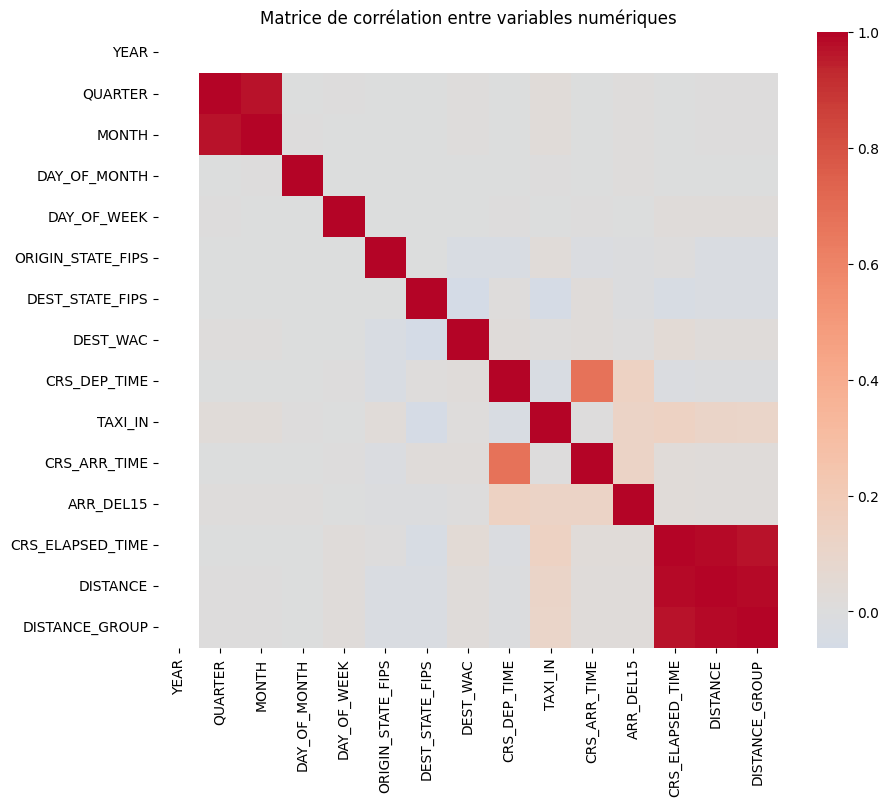

In [52]:
num_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", center=0)
plt.title("Matrice de corr√©lation entre variables num√©riques")
plt.show()

Affiche une heatmap color√©e qui montre les relations entre les variables.

- üî¥ Corr√©lation proche de 1 : relation lin√©aire positive forte
- üîµ Corr√©lation proche de -1 : relation lin√©aire n√©gative forte
- ‚ö™ Corr√©lation proche de 0 : relation faible ou inexistante

Ce que l'on remarque :
 - DISTANCE / DISTANCE_GROUPE / CRS_ELAPSED_TIME : Varient ensemble ce qui est logique. Plus un vol est long, plus sa dur√©e/distance pr√©vue l‚Äôest aussi (>0.8)
 - CRS_ARR_TIME / ARR_DEL15 : Les horaires d‚Äôarriv√©e pr√©vus influencent mod√©r√©ment le retard. Peut refl√©ter une heure de la journ√©e critique. (~0.35)
 - CRS_DEP_TIME / ARR_DEL15 : Plage horaire de d√©part √©galement influencent mod√©r√©ment le retard (d√©j√† observ√© dans l'analyse pr√©c√©dente). (~0.25)

---

### 5.HYPOTH√àSES

#### H1 : Retards selon la plage horaire de d√©part (DEP_TIME_BLK)

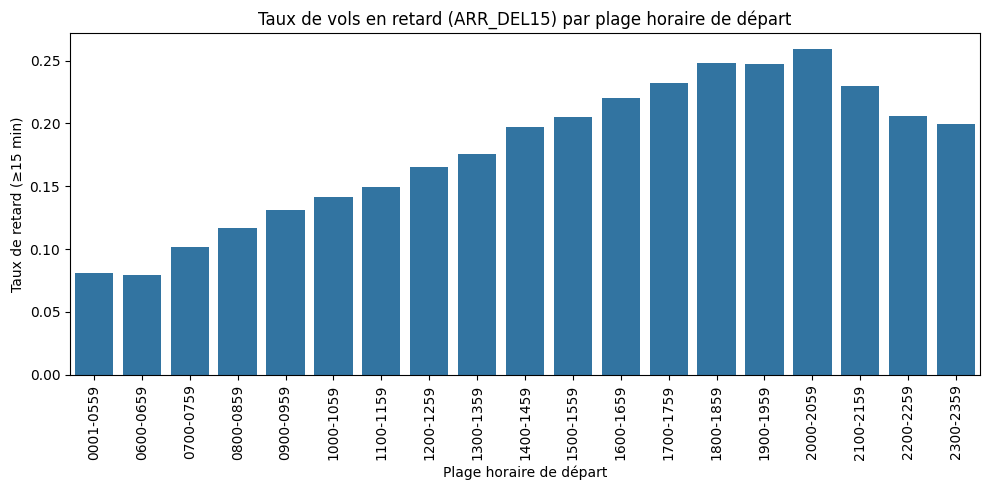

In [48]:
delay_by_blk = df.groupby('DEP_TIME_BLK')['ARR_DEL15'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(
    data=delay_by_blk,
    x='DEP_TIME_BLK',
    y='ARR_DEL15'
)
plt.title("Taux de vols en retard (ARR_DEL15) par plage horaire de d√©part")
plt.ylabel("Taux de retard (‚â•15 min)")
plt.xlabel("Plage horaire de d√©part")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Selon le graphique ci-dessus, l‚Äôhypoth√®se selon laquelle la plage horaire a un impact sur le retard est valid√©e.

- Taux de retard (ARR_DEL15) varie fortement selon les plages horaires.
  - Plus √©lev√© en fin de journ√©e (de 16h √† 23h59).
  - √Ä l'inverse, les vols t√¥t le matin (de 06h00 √† 09h00) pr√©sentent les taux de retard les plus faibles.

#### H2 : Taux de retard par compagnie (UNIQUE_CARRIER)

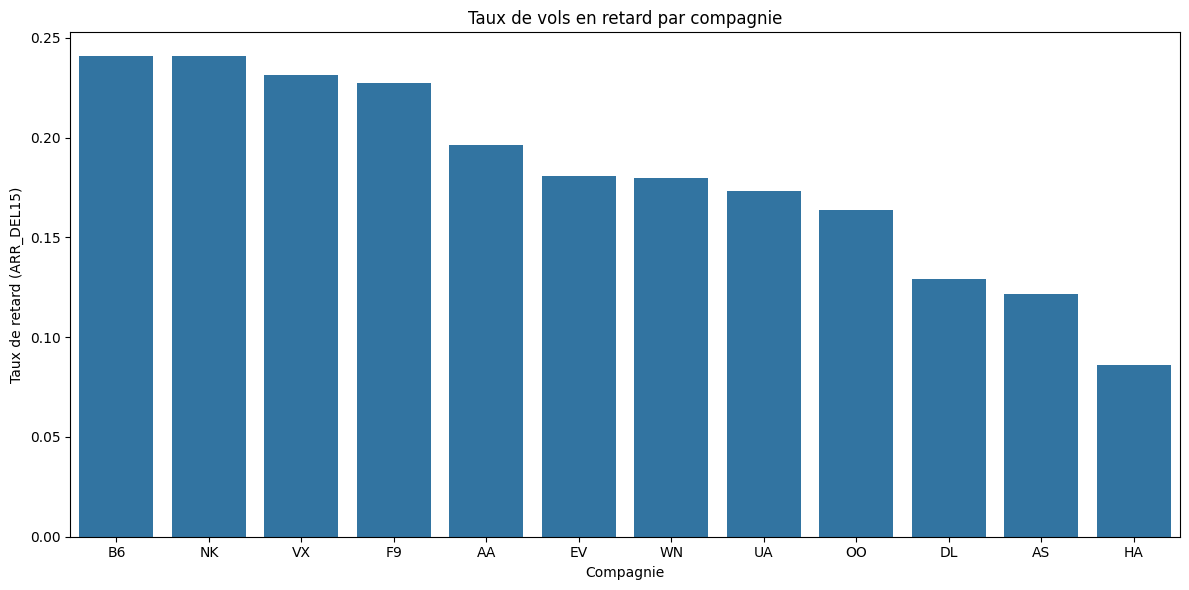

In [28]:
carrier_delay = df.groupby('UNIQUE_CARRIER')['ARR_DEL15'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(
    data=carrier_delay,
    x='UNIQUE_CARRIER',
    y='ARR_DEL15',
)
plt.title("Taux de vols en retard par compagnie")
plt.ylabel("Taux de retard (ARR_DEL15)")
plt.xlabel("Compagnie")
plt.tight_layout()
plt.show()

Selon le graphique ci-dessus, l‚Äôhypoth√®se selon laquelle la compagnie impacte le retard √† l'arriv√©e est valid√©

On observe une variation nette entre les compagnies :
- NK (Spirit Airlines) d√©passe 30 % de vols en retard.
- √Ä l‚Äôoppos√©, HA (Hawaiian Airlines) est sous les 10 %.
- L‚Äô√©cart entre la meilleure et la pire compagnie est significatif (~20 points).

#### H3 : Taux de retard par a√©roport d‚Äôorigine (ORIGIN)

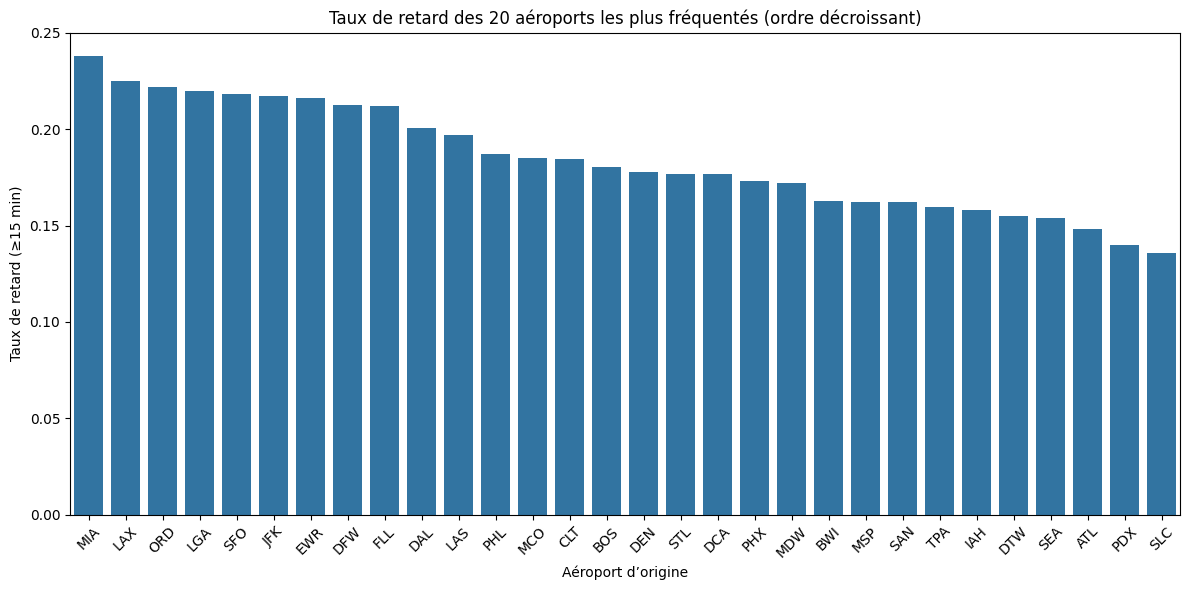

In [44]:
top_airports = df['ORIGIN'].value_counts().nlargest(30).index

airport_delay = (
    df[df['ORIGIN'].isin(top_airports)]
    .groupby('ORIGIN')['ARR_DEL15']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=airport_delay.index, 
    y=airport_delay.values
)
plt.title("Taux de retard des 20 a√©roports les plus fr√©quent√©s (ordre d√©croissant)")
plt.ylabel("Taux de retard (‚â•15 min)")
plt.xlabel("A√©roport d‚Äôorigine")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Selon le graphique ci-dessus, l‚Äôhypoth√®se selon laquelle l'a√©roport d'origine impacte le retard √† l'arriv√©e est valid√©

- On observe une variations entre les a√©roports :

  - MLA atteint pr√®s de 25 % de vols retard√©s.
  - D‚Äôautres comme ATL (Atlanta) ou IAH (Houston) sont sous les 15 %.

- L'√©cart entre les extr√™mes est d‚Äôenviron 10 points, ce qui est significatif en aviation.

#### H4 : Taux de retard selon le jour de la semaine

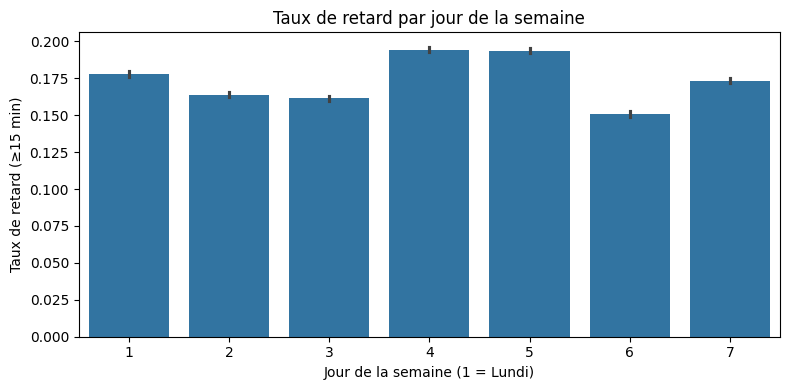

In [46]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df, 
    x='DAY_OF_WEEK', 
    y='ARR_DEL15'
)
plt.title('Taux de retard par jour de la semaine')
plt.ylabel('Taux de retard (‚â•15 min)')
plt.xlabel('Jour de la semaine (1 = Lundi)')
plt.tight_layout()
plt.show()


Selon le graphique ci-dessus, l‚Äôhypoth√®se selon laquelle la plage horaire d‚Äôarriv√©e impacte le retard √† l'arriv√©e est valid√©

On observe :

- Des pics de retard entre :

  - 20h00‚Äì22h59 (~21 %)
  - 23h00‚Äì00h59 (~20 %)

- Des creux sur les cr√©neaux matinaux :
  
  - 06h00‚Äì07h59 (~10 %)
  - 08h00‚Äì09h59 (~12‚Äì13 %)

- Les vols du soir sont plus sujets aux retards : probable effet d‚Äôaccumulation des retards tout au long de la journ√©e.
- Les vols du matin sont plus ponctuels : la cha√Æne d‚Äôexploitation d√©marre "propre", sans effet domino.

#### H5 : Taux de retard selon le mois

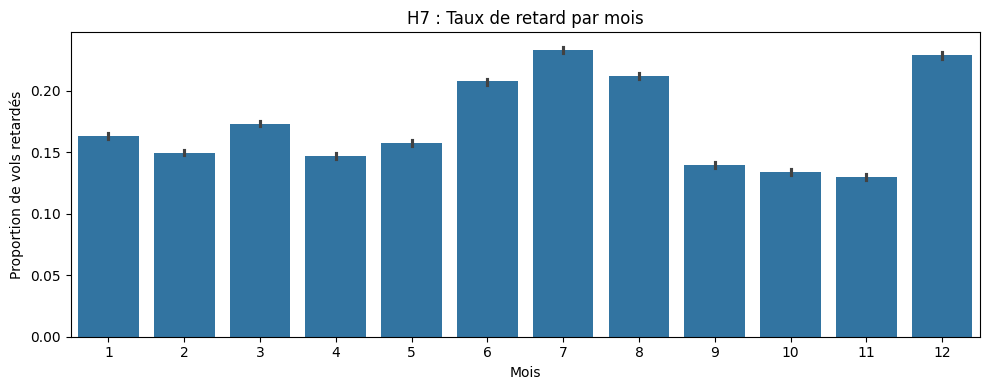

In [47]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x='MONTH', y='ARR_DEL15')
plt.title('H7 : Taux de retard par mois')
plt.ylabel('Proportion de vols retard√©s')
plt.xlabel('Mois')
plt.tight_layout()
plt.show()

Selon le graphique ci-dessus, l‚Äôhypoth√®se selon laquelle le mois de l'ann√©e impacte le retard √† l'arriv√©e est valid√©

On observe des variations claires du taux de retard (ARR_DEL15) selon les mois :
- Juillet (7) et d√©cembre (12) ont les taux de retard les plus √©lev√©s (‚âà 23%).
- Septembre (9), octobre (10) et novembre (11) ont les taux les plus bas (‚âà 13%).

#### H6 : Plus la distance d‚Äôun vol est grande, plus il a de risques d‚Äô√™tre en retard

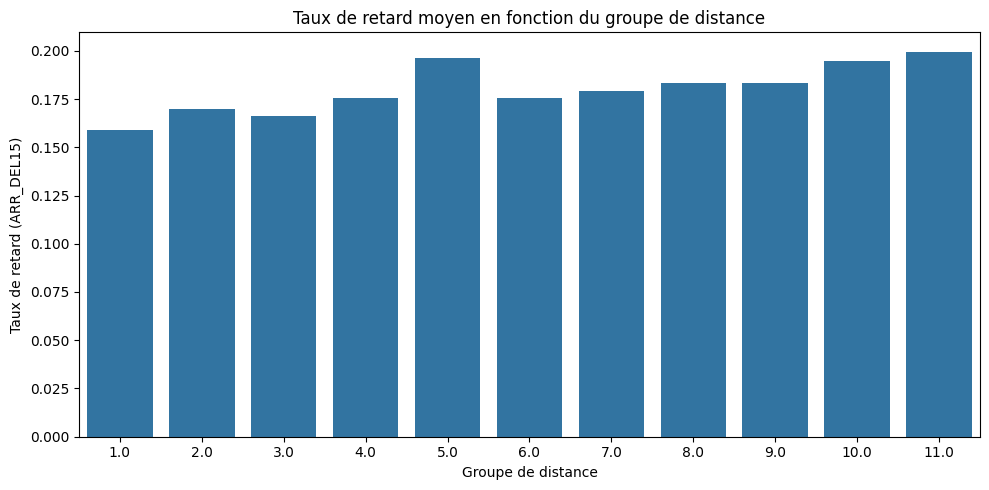

In [32]:
delay_by_distance = df.groupby('DISTANCE_GROUP')['ARR_DEL15'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=delay_by_distance.index, y=delay_by_distance.values)
plt.title("Taux de retard moyen en fonction du groupe de distance")
plt.xlabel("Groupe de distance")
plt.ylabel("Taux de retard (ARR_DEL15)")
plt.tight_layout()
plt.show()

Selon le graphique ci-dessus, l‚Äôhypoth√®se selon laquelle plus la distance d‚Äôun vol est grande, plus il a de risques d‚Äô√™tre en retard est partiellement valid√©


- On observe une l√©g√®re augmentation du taux de retard avec la distance du vol (4% de variation). Cependant, cela reste faible compar√© √† d'autres facteurs comme l‚Äôheure de d√©part ou l‚Äôa√©roport.

---

### EXPORT DU CSV

Supprime les outiliers

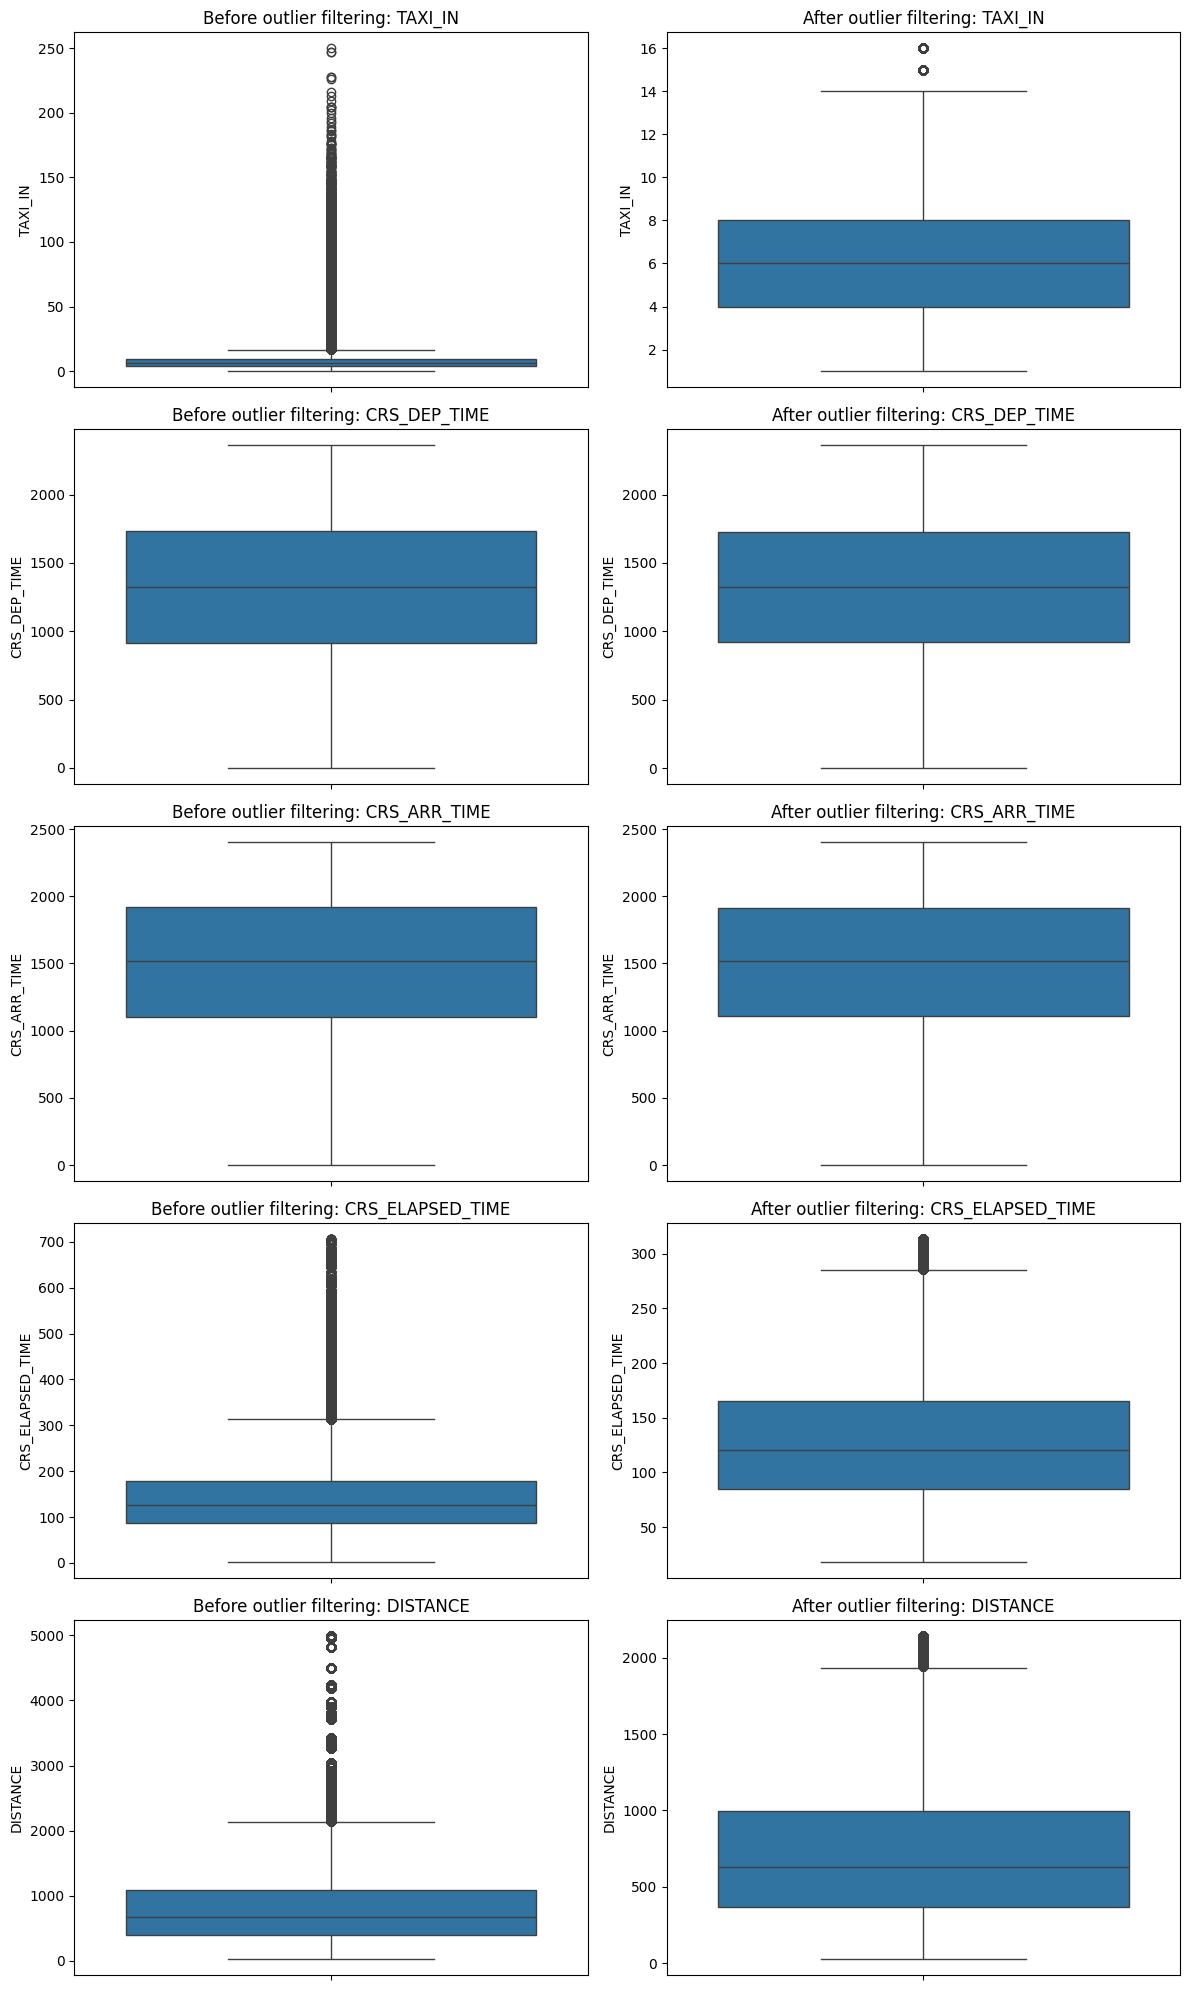

In [33]:
def outliners_filter(df, col: str):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[col] >= lower_bound) & (df[col] <= upper_bound)

# 2. Select columns to filter
columns_to_filter = [
    'TAXI_IN',
    'CRS_DEP_TIME',
    'CRS_ARR_TIME',
    'CRS_ELAPSED_TIME',
    'DISTANCE'
]

# 3. Compute global mask and filtered DataFrame
global_mask = pd.Series(True, index=full_df.index)
for col in columns_to_filter:
    if col in full_df.columns:
        global_mask &= outliners_filter(full_df, col)

filtered_df = full_df[global_mask]

# 4. Plot boxplots before/after side by side
n = len(columns_to_filter)
fig, axes = plt.subplots(n, 2, figsize=(12, 4 * n))

for i, col in enumerate(columns_to_filter):
    if col in full_df.columns:
        sns.boxplot(y=full_df[col], ax=axes[i, 0])
        axes[i, 0].set_title(f"Before outlier filtering: {col}")
        
        sns.boxplot(y=filtered_df[col], ax=axes[i, 1])
        axes[i, 1].set_title(f"After outlier filtering: {col}")

plt.tight_layout()
plt.show()

In [ ]:
df.to_csv("data/processed/cleaned_data.csv", index=False)